In [1]:
from array import array
import itertools
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
from matplotlib.ticker import NullFormatter

from scipy.optimize import curve_fit

#This line is important. On this server I don't know if we have the ability to output plots. This is a solution.

%matplotlib inline

#Importing root_pandas and root_numpy.

import sys
sys.path.insert(0,'/usr/common/software/rootpy/')
import root_numpy
import root_pandas as rpd
import ROOT
from root_pandas import read_root
from root_numpy import hist2array

Welcome to ROOTaaS 6.06/06


In [2]:
# ppFilename = ('/global/project/projectdirs/alice/jsoria/trackEff/OutputData/fout_16_13d_3run_forTrig_noEThresh_trigEff_wCuts.root')
ppFilename = ('/global/project/projectdirs/alice/jsoria/trackEff/OutputData/fout_16_17q_CENT_wSDD_3run_forTrig_noEThresh_trigEff_wCuts.root')
    
ppFile        = ROOT.TFile(ppFilename)

pp_cluster_pt = ppFile.Get("cluster_pt")
pp_MB         = ppFile.Get("hMB_E")
pp_EG2        = ppFile.Get("hEG2_E")

pp_x_axis_pt  = np.array([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59])

pp_x_axis_trig     = np.array([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5])
pp_x_axis_trig_err = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

cluster_pt = root_numpy.hist2array(pp_cluster_pt)
EG2        = root_numpy.hist2array(pp_EG2)
MB         = root_numpy.hist2array(pp_MB)

In [3]:
###For 13d
###EG2 Events = 8392
###MB Events = 186044

###For 17q
###EG2 Events = 342629
###MB Events = 75514

def error(array,factor):
    
    array_factor = factor * array
    array_factor_err = np.divide(np.sqrt(array_factor),factor)
    
    return array_factor_err

if('/global/project/projectdirs/alice/jsoria/trackEff/OutputData/fout_16_13d_3run_forTrig_noEThresh_trigEff_wCuts' in ppFilename):
    
    EG2_err = error(EG2,8392)
    MB_err  = error(MB,186044)
    
else:
    
    EG2_err = error(EG2,342629)
    MB_err  = error(MB,75514)

In [4]:
pp_EG2_MB_ratio = np.divide(EG2,MB)

pp_EG2_MB_ratio_err = np.sqrt(np.divide(EG2_err,MB)**2 + np.divide(EG2*MB_err,MB**2)**2)

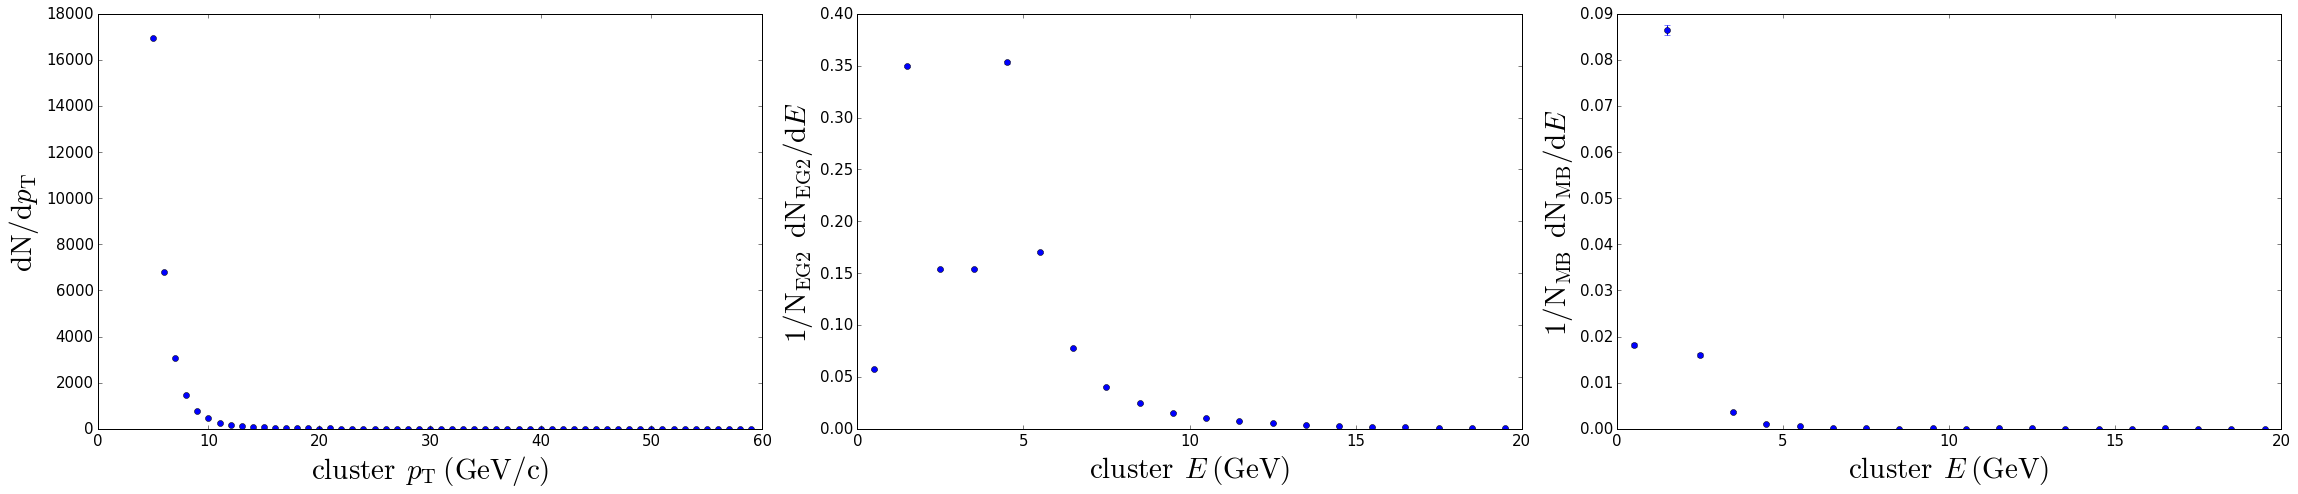

In [5]:
fig = plt.figure(figsize=(32,7))

plt.subplot(1,3,1)
plt.plot(pp_x_axis_pt,cluster_pt,'bo')

plt.xlabel(r'$\mathrm{cluster} \:\: p_{\mathrm{T}} \:(\mathrm{GeV/c})$',fontsize = 29)
plt.ylabel(r'$ \mathrm{dN}/\mathrm{d} p_\mathrm{T}$',fontsize = 29)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(1,3,2)
plt.errorbar(pp_x_axis_trig,EG2,yerr=EG2_err,fmt='bo')

plt.xlabel(r'$\mathrm{cluster} \:\: E \:(\mathrm{GeV})$',fontsize = 29)
plt.ylabel(r'$1/ \mathrm{N_{EG2}} \:\: \mathrm{dN_{EG2}}/\mathrm{d} E$',fontsize = 29)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(1,3,3)
plt.errorbar(pp_x_axis_trig,MB,yerr=MB_err,fmt='bo')

plt.xlabel(r'$\mathrm{cluster} \:\: E \:(\mathrm{GeV})$',fontsize = 29)
plt.ylabel(r'$1/ \mathrm{N_{MB}} \:\: \mathrm{dN_{MB}}/\mathrm{d} E$',fontsize = 29)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

fig.tight_layout()
plt.show()

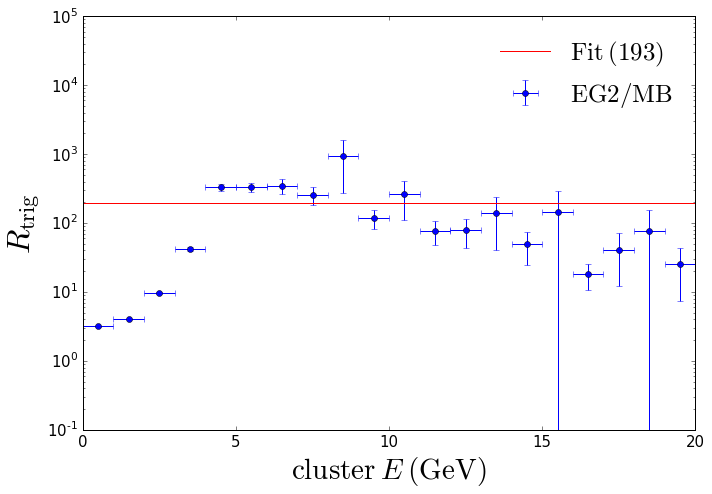

In [6]:
fig = plt.figure(figsize=(10,7))

plt.errorbar(pp_x_axis_trig,pp_EG2_MB_ratio,xerr=pp_x_axis_trig_err,yerr=pp_EG2_MB_ratio_err,fmt='bo',label=r'$\mathrm{EG2}/\mathrm{MB}$')

if('/global/project/projectdirs/alice/jsoria/trackEff/OutputData/fout_16_13d_3run_forTrig_noEThresh_trigEff_wCuts' in ppFilename): 
    
    plt.axhline(y=337.486, color='r', linestyle='-',label=r'$\mathrm{Fit \: (337)}$')

else:
    
    plt.axhline(y=192.806, color='r', linestyle='-',label=r'$\mathrm{Fit \: (193)}$')

plt.xlabel(r'$\mathrm{cluster} \: E \:(\mathrm{GeV})$',fontsize = 29)
plt.ylabel(r'$R_{\mathrm{trig}}$',fontsize = 32)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);
plt.ylim((0.1,100000))

plt.yscale('log')

fig.tight_layout()
plt.legend(prop={'size':25},frameon=False,numpoints=1)
plt.show()

fig.savefig('pp_ratio.pdf')

In [8]:
np.polyfit(pp_x_axis_trig[5:20],pp_EG2_MB_ratio[5:20],0)

array([ 192.80605214])

In [9]:
###Doing this before for the fit

# def func(x, m, b): 
#     return m*x + b

# popt,pcov = curve_fit(func, pp_x_axis, pp_EG2_MB_ratio) 